In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_csv('1730285881-Airbnb_Open_Data.csv', low_memory=False)




In [12]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [14]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [15]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [28]:
# Step 1: Convert to string (including NaNs)
df['price'] = df['price'].astype(str).fillna('')

# Step 2: Remove unwanted characters
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Step 3: Convert to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')




In [31]:
# Convert to string (handle NaNs)
df['service fee'] = df['service fee'].astype(str).fillna('')

# Remove the dollar sign
df['service fee'] = df['service fee'].str.replace('$', '', regex=False)

# Remove commas if any
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# Convert to numeric (float), coercing errors to NaN
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')


In [33]:
# Convert price column to string (if not already)
df['price'] = df['price'].astype(str).fillna('')

# Remove commas from price
df['price'] = df['price'].str.replace(',', '', regex=False)


In [34]:
df.rename(columns={
    'price':'price_$',
    'service_fee':'service_fee_$'
    },inplace=True)

In [35]:
df.dropna(inplace=True)

In [37]:
df['price_$']=df['price_$'].astype(float)

In [41]:
df['service fee'] = df['service fee'].astype(str).fillna('')
df['service fee'] = df['service fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')


In [42]:
df['id']=df['id'].astype(str)

In [43]:
df['host id']=df['host id'].astype(str)

In [45]:
df['last review']=pd.to_datetime(df['last review'])

In [46]:
df['Construction year']=df['Construction year'].astype(int)

In [47]:
df.loc[df['neighbourhood group']  == 'brookln','neighbour group']='Brooklyn'

In [48]:
df=df.drop(df[df['availability 365']>500].index)

In [51]:
df.duplicated().value_counts()

,count
False,83567


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83567 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83567 non-null  object        
 1   NAME                            83567 non-null  object        
 2   host id                         83567 non-null  object        
 3   host_identity_verified          83567 non-null  object        
 4   host name                       83567 non-null  object        
 5   neighbourhood group             83567 non-null  object        
 6   neighbourhood                   83567 non-null  object        
 7   lat                             83567 non-null  float64       
 8   long                            83567 non-null  float64       
 9   country                         83567 non-null  object        
 10  country code                    83567 non-null  object        
 11  instan

In [53]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83567.000000,83567.000000,83567.000000,83567.000000,83389.000000,83567.000000,83567.000000,83567.000000,83567,83567.000000,83567.000000,83567.000000,83567.000000
mean,40.727354,-73.948502,0.497732,2012.488530,626.209668,125.232436,7.418981,32.248184,2019-06-09 04:55:24.163844352,1.376337,3.278627,7.047531,141.747652
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687655,-73.982120,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,0.499998,5.761109,331.803443,66.357813,28.114949,51.936949,NaN,1.750221,1.283771,29.583715,133.385913


In [54]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44259
Private room,37549
Shared room,1651
Hotel room,108


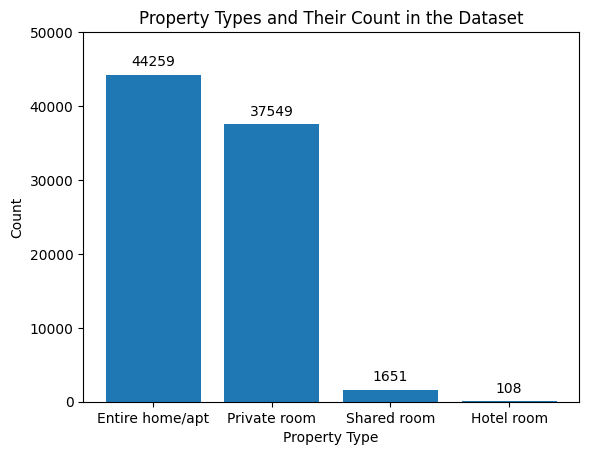

In [64]:


# Create the bar chart
room_type_bar = plt.bar(property_types.index, property_types["count"])

# Add count labels on top of bars
plt.bar_label(room_type_bar, labels=property_types["count"], padding=4)

# Customize the plot
plt.ylim([0, 50000])
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Types and Their Count in the Dataset')

# Show the plot
plt.show()


In [60]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34683
Manhattan,34641
Queens,11152
Bronx,2272
Staten Island,818
brookln,1


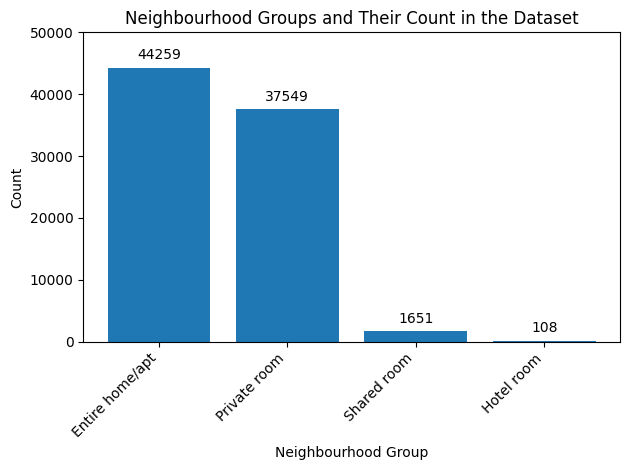

In [66]:


# Create the bar chart
hood_group_bar = plt.bar(property_types.index, property_types["count"])

# Add count labels on top of bars
plt.bar_label(hood_group_bar, labels=property_types["count"], padding=4)

# Customize the plot
plt.ylim([0, 50000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Groups and Their Count in the Dataset')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels if they overlap
plt.tight_layout()
plt.show()


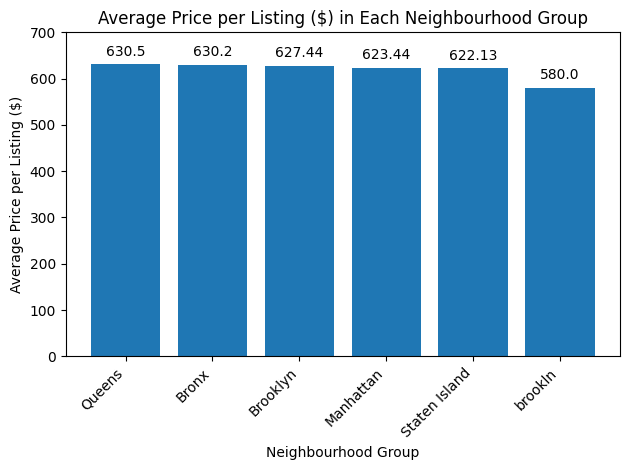

In [68]:
import matplotlib.pyplot as plt

# Group by 'neighbourhood group' and calculate average price
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False)

# Create the bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price)

# Add labels on top of bars
plt.bar_label(avg_price_bar, labels=avg_price.round(2), label_type='edge', padding=4)

# Customize the plot
plt.ylim([0, 700])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price per Listing ($) in Each Neighbourhood Group')
plt.tight_layout()

# Show the plot
plt.show()


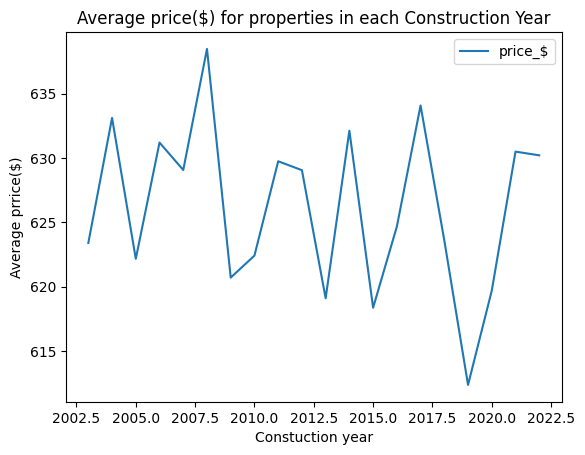

In [75]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Constuction year')
plt.ylabel('Average prrice($)');
plt.title('Average price($) for properties in each Construction Year');

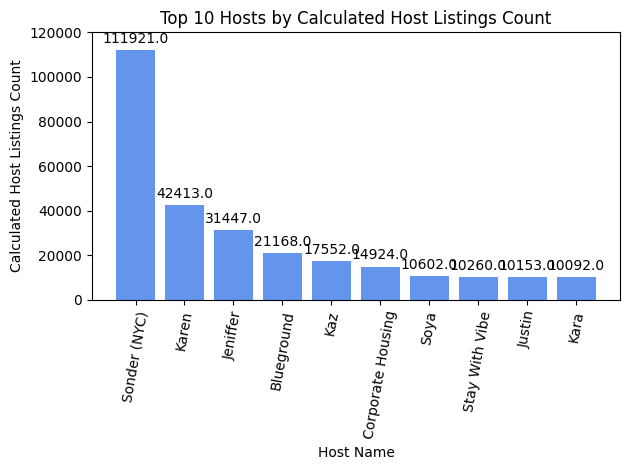

In [78]:
import matplotlib.pyplot as plt

# Group by host name and sum listing counts
hosts = df.groupby('host name')['calculated host listings count'].sum().nlargest(10).to_frame()

# Plot the bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'], color='cornflowerblue')

# Add labels to bars
plt.bar_label(hosts_bar, labels=hosts['calculated host listings count'], label_type='edge', padding=3)

# Customize the plot
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.tight_layout()

# Show the plot
plt.show()


In [88]:

review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review






,review rate number
host_identity_verified,
verified,3.283782
unconfirmed,3.273473


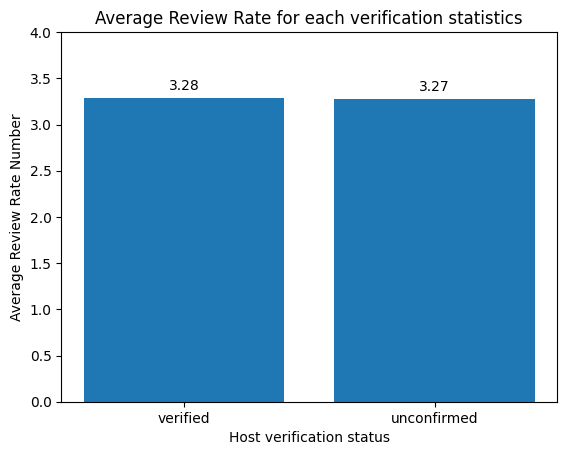

In [91]:
review_bar =plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification statistics');

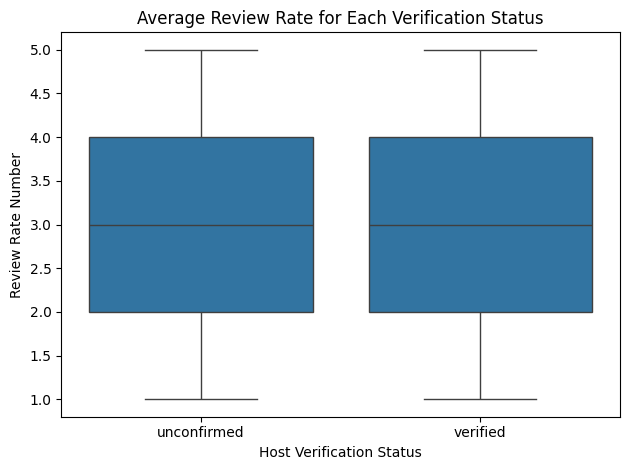

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set base color
base_color = sns.color_palette()[0]

# Create the boxplot
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

# Add labels and title
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for Each Verification Status')

# Optional: Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [102]:
df['price_$'].corr(df['service_fee_$'])


np.float64(0.9999909082976466)

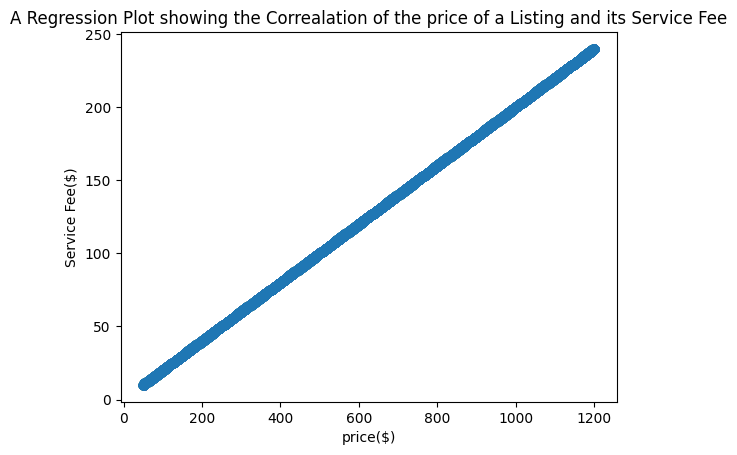

In [103]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('price($)');
plt.ylabel("Service Fee($)");
plt.title('A Regression Plot showing the Correalation of the price of a Listing and its Service Fee');

In [105]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.308924
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242757
                    Hotel room                 3.833333
                    Private room               3.274239
                    Shared room                3.325083
Manhattan           Entire home/apt            3.268773
                    Hotel room                 3.500000
                    Private room               3.285877
                    Shared room                3.256716
Queens              Entire home/apt            3.347992
                    Hotel room                 3.750000
                    Private room               3.310958
                    Shared room                3.327402
Staten Island       Entire home/apt            3.330144
                    Private room               3.498728
                    Shared room                3.714286
brookln             Private room               4.000000

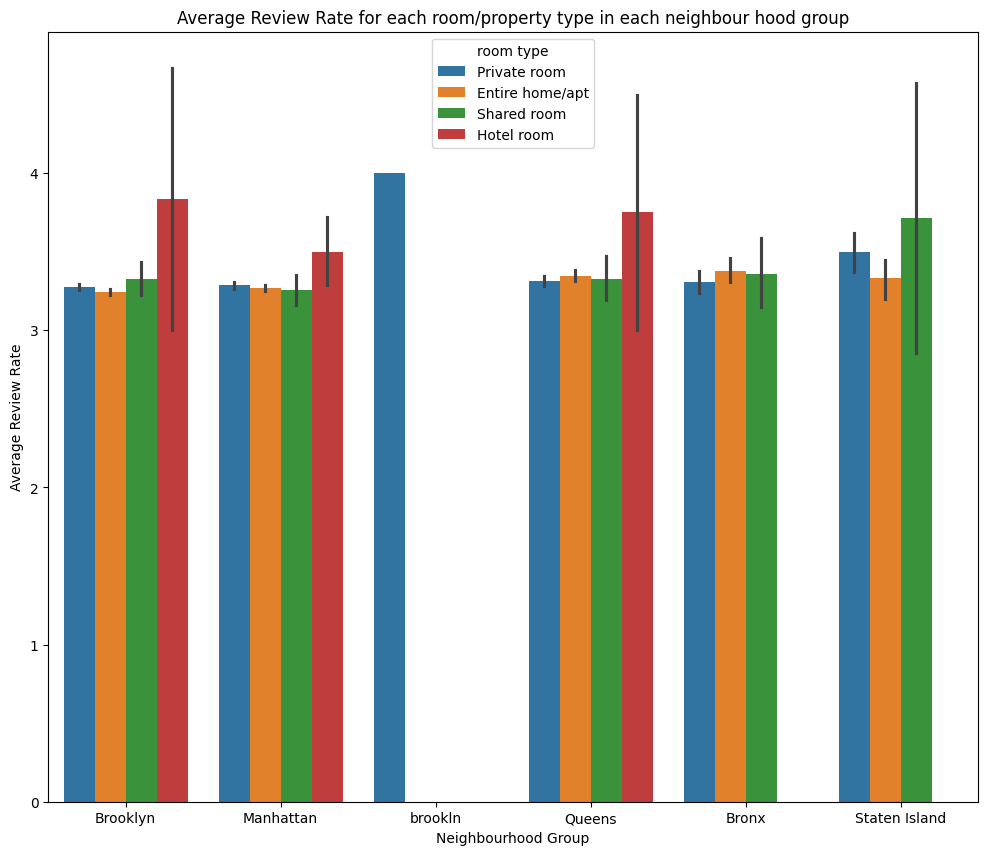

In [106]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each room/property type in each neighbour hood group');

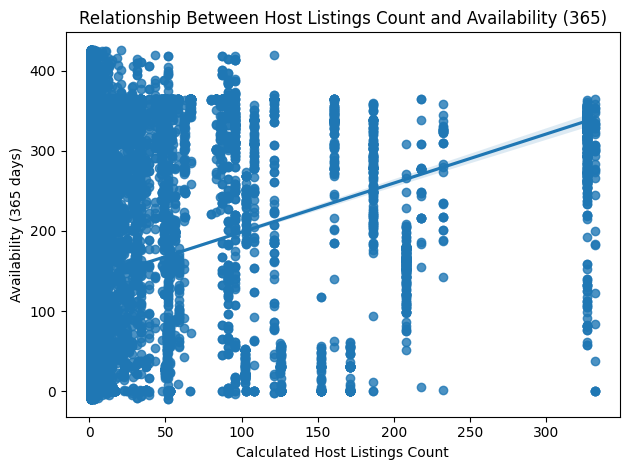

In [112]:


# Regression plot
sns.regplot(data=df, x='calculated host listings count', y='availability 365');

# Labels and title
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (365 days)')
plt.title('Relationship Between Host Listings Count and Availability (365)')
plt.tight_layout()
plt.show()


In [117]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13561610174148112)